<a href="https://colab.research.google.com/github/ytg000629/ai4dl/blob/main/week4/chapter04_getting-started-with-neural-networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [ ]:
?imdb.load_data

Object `imdb.load_data` not found.


In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
#num_words
#등장 빈도 순위로 몇 등까지의 단어를 사용할 것인지
#10,000을 넣으면, 등장 빈도 순위가 1~10,000에 해당하는 단어만 사용
#단어 집합의 크기는 10,000

#토큰화와 정수 인코딩이라는 텍스트 전처리가 끝난 상태
#IMDB 리뷰 데이터는 전체 데이터에서 각 단어들의 등장 빈도에 따라서 인덱스를 부여

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
train_data.shape

(25000,)

In [5]:
train_data[0][:20]
#실제 순위에서 +3 된 정수들임
#(맵핑된 수 - 3)은 몇번째로 많이 반복된 단어인가를 나타냄
#IMDB 리뷰 데이터셋에서는 0, 1, 2, 3은 특별 토큰으로 취급하고 있음. 그래서 정수 4부터가 실제 IMDB 리뷰 데이터셋에서 빈도수가 가장 높은 실제 영단어

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25]

In [6]:
len(train_data[0])

218

In [7]:
train_labels[0]
#positive 1
#negative 0

1

In [8]:
[ 3*i if (i*3 > 5) else 0 for i in range(3)]

[0, 0, 6]

In [9]:
[ 3*i for i in range(3) if (i*3 > 5)]

[6]

In [11]:
max([max(sequence) for sequence in train_data])
#num_words 를 10000으로 했기 때문

9999

**Decoding reviews back to text**

In [12]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

#items() 사용해서 딕셔너리에 있는 키와 값들의 쌍을 얻기

#get(x) 함수는 x라는 Key에 대응되는 Value를 리턴
#딕셔너리 안에 찾으려는 Key가 없을 경우 미리 정해 둔 디폴트 값을 대신 가져오게 함 -> "?""

#'구분자'.join(list)를 이용하면 list의 값과 값 사이에 '구분자'에 들어온 구분자를 넣어서 하나의 문자열로 합쳐줌

1641221/1641221 [==============================] - 0s 0us/step


In [13]:
from itertools import islice
#딕셔너리 일부만 출력하려고

In [14]:
dict(islice(imdb.get_word_index().items(), 20))
# imdb.get_word_index()에 각 단어와 맵핑되는 정수가 저장되어져 있음 -> 실제로 각각의 수는 몇번째로 많이 반복된 단어인가를 나타냄
# imdb.get_word_index()에 저장된 값에 +3을 해야 실제 맵핑되는 정수임. 이건 그냥 IMDB 리뷰 데이터셋에서 정한 규칙

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013}

In [15]:
imdb.get_word_index().get('the')

1

In [16]:
dict(islice(reverse_word_index.items(), 20))
#key와 value를 바꿈

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's"}

In [22]:
train_data[0][:3]
#실제 순위는 -2,11,19

[1, 14, 22]

In [18]:
reverse_word_index.get(1 - 3, "?")

'?'

In [19]:
reverse_word_index.get(14 - 3, "?")

'this'

In [20]:
reverse_word_index.get(22 - 3, "?")

'film'

In [21]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [30]:
#멀티 핫 인코딩
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [31]:
x_train.shape

(25000, 10000)

In [32]:
x_train[0]
# 맵핑된 정수가 1,14,22면 1번째 14번째 22번째 원소가 1, 나머지는 0

array([0., 1., 1., ..., 0., 0., 0.])

In [33]:
x_train[0][1]

1.0

In [34]:
x_train[0][14]

1.0

In [35]:
x_train[0][22]

1.0

In [36]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [43]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid") #output 0,1 -> 크기 1
])

**Compiling the model**

In [44]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [45]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [46]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 74ms/step - loss: 0.5439 - accuracy: 0.7695 - val_loss: 0.4041 - val_accuracy: 0.8556
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3231 - accuracy: 0.8920 - val_loss: 0.3124 - val_accuracy: 0.8846
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2365 - accuracy: 0.9221 - val_loss: 0.2794 - val_accuracy: 0.8918
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1942 - accuracy: 0.9349 - val_loss: 0.2751 - val_accuracy: 0.8896
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1601 - accuracy: 0.9461 - val_loss: 0.2890 - val_accuracy: 0.8853
Epoch 6/20
30/30 [==============================] - 2s 68ms/step - loss: 0.1358 - accuracy: 0.9581 - val_loss: 0.2945 - val_accuracy: 0.8850
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1156 - accuracy: 0.9641 - val_loss: 0.3030 - val_accuracy: 0.8862
Epoch 8/20
30

In [47]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

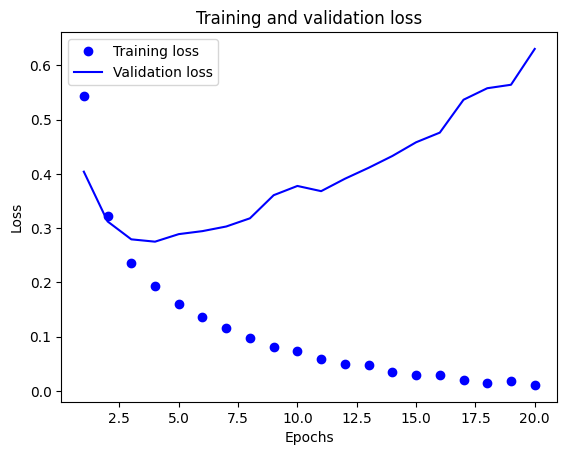

In [48]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

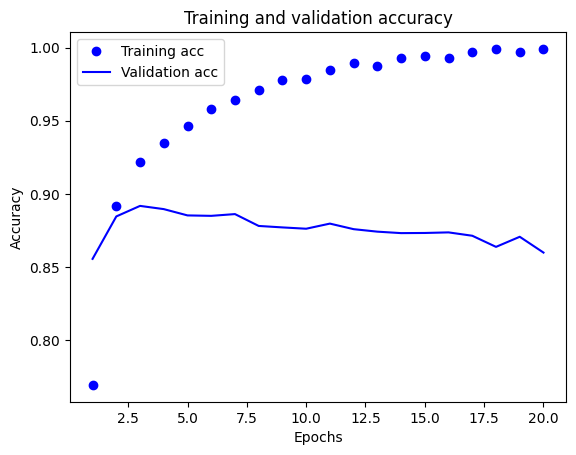

In [49]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

에포크를 4로 설정하는 게 가장 좋아보임

**Retraining a model from scratch**

In [54]:
#에포크 4로 해보기
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 42ms/step - loss: 0.4383 - accuracy: 0.8132
Epoch 2/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2546 - accuracy: 0.9065
Epoch 3/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2014 - accuracy: 0.9281
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.3435 - accuracy: 0.8668


In [55]:
results
#test loss, test accuracy

[0.34346339106559753, 0.8668000102043152]

### Using a trained model to generate predictions on new data

In [56]:
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.27948156],
       [0.99983954],
       [0.973962  ],
       ...,
       [0.20828187],
       [0.0873377 ],
       [0.8352813 ]], dtype=float32)

Q.1 Try using one or three hidden layers, and see how doing so affects validation and test accuracy

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 93ms/step - loss: 0.4996 - accuracy: 0.7862 - val_loss: 0.4372 - val_accuracy: 0.8113
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3227 - accuracy: 0.8949 - val_loss: 0.3227 - val_accuracy: 0.8794
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2549 - accuracy: 0.9167 - val_loss: 0.2926 - val_accuracy: 0.8887
Epoch 4/20
30/30 [==============================] - 2s 54ms/step - loss: 0.2118 - accuracy: 0.9327 - val_loss: 0.2885 - val_accuracy: 0.8846
Epoch 5/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1871 - accuracy: 0.9404 - val_loss: 0.2884 - val_accuracy: 0.8830
Epoch 6/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1649 - accuracy: 0.9503 - val_loss: 0.2769 - val_accuracy: 0.8867
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1497 - accuracy: 0.9546 - val_loss: 0.2773 - val_accuracy: 0.8880
Epoch 8/20
30

In [ ]:
results = model.evaluate(x_test, y_test)
results

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [ ]:
results = model.evaluate(x_test, y_test)
results

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [ ]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

In [ ]:
len(test_data)

In [ ]:
train_data[10]

**Decoding newswires back to text**

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [ ]:
train_labels[10]

### Preparing the data

**Encoding the input data**

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [ ]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [ ]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

**Plotting the training and validation loss**

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [ ]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

In [ ]:
results

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

### Generating predictions on new data

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions[0].shape

In [ ]:
np.sum(predictions[0])

In [ ]:
np.argmax(predictions[0])

### A different way to handle the labels and the loss

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [ ]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [ ]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [ ]:
train_data.shape

In [ ]:
test_data.shape

In [ ]:
train_targets

### Preparing the data

**Normalizing the data**

In [ ]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [ ]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [ ]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

In [ ]:
all_scores

In [ ]:
np.mean(all_scores)

**Saving the validation logs at each fold**

In [ ]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

### Wrapping up

## Summary